# Reading and Parsing LAS File Using Welly

Docs: https://code.agilescientific.com/welly/

In [5]:
import welly

`welly.read_las()` creates a project containing one or more wells. If the project contains more than one well, it can be accessed by `project[#]`.

In [10]:
well = welly.Well.from_las('Data/test.las')
# well = project[0]
well
# print(well.l)

Only engine='normal' can read wrapped files


Well(uwi: '', name: 'SMBC39', 6 curves: ['GAM(NAT)', 'SP', 'RES(16N)', 'RES(64N)', 'RES', 'LATERAL'])

### Data Exploration

`header` contains well information from WELL part of the LAS file.

In [ ]:
well.header

,original_mnemonic,mnemonic,unit,value,descr,section
0,VERS,VERS,,2.0,CWLS LOG ASCII STANDARD -VERSION 2.0,Version
1,STRT,STRT,FT,1.2,START DEPTH,Well
2,STOP,STOP,FT,1599.2,STOP DEPTH,Well
3,STEP,STEP,FT,0.1,STEP UP_HOLE,Well
4,NULL,NULL,,-999.25,NULL VALUE,Well
...,...,...,...,...,...,...
65,FD,FD,K/M3,,Fluid Density,Parameter
66,DFV,DFV,S,,Fluid Viscosity,Parameter
67,FPH,FPH,,,Fuild PH,Parameter
68,ELCO,ELCO,,2500,Electron Cutoff,Parameter


`location` contains location information and each item can be accessed by `well.location.ItemName`

In [ ]:
well.location
# well.location.state

In [ ]:
well.data

c:\Users\haebi\AppData\Local\Programs\Python\Python311\Lib\site-packages\welly\curve.py:470: FutureWarning: Index.is_numeric is deprecated. Use pandas.api.types.is_any_real_numeric_dtype instead
  if self.df.index.is_numeric() and not self.df.index.empty:
c:\Users\haebi\AppData\Local\Programs\Python\Python311\Lib\site-packages\welly\curve.py:470: FutureWarning: Index.is_numeric is deprecated. Use pandas.api.types.is_any_real_numeric_dtype instead
  if self.df.index.is_numeric() and not self.df.index.empty:
c:\Users\haebi\AppData\Local\Programs\Python\Python311\Lib\site-packages\welly\curve.py:470: FutureWarning: Index.is_numeric is deprecated. Use pandas.api.types.is_any_real_numeric_dtype instead
  if self.df.index.is_numeric() and not self.df.index.empty:
c:\Users\haebi\AppData\Local\Programs\Python\Python311\Lib\site-packages\welly\curve.py:470: FutureWarning: Index.is_numeric is deprecated. Use pandas.api.types.is_any_real_numeric_dtype instead
  if self.df.index.is_numeric() and n

{'GAM(NAT)': Curve(mnemonic=GAM(NAT), units=API-GR, start=1.2000, stop=1599.2000, step=0.1000, count=[15919]),
 'SP': Curve(mnemonic=SP, units=MV, start=1.2000, stop=1599.2000, step=0.1000, count=[15909]),
 'RES(16N)': Curve(mnemonic=RES(16N), units=OHM-M, start=1.2000, stop=1599.2000, step=0.1000, count=[15909]),
 'RES(64N)': Curve(mnemonic=RES(64N), units=OHM-M, start=1.2000, stop=1599.2000, step=0.1000, count=[15909]),
 'RES': Curve(mnemonic=RES, units=OHM, start=1.2000, stop=1599.2000, step=0.1000, count=[15909]),
 'LATERAL': Curve(mnemonic=LATERAL, units=OHM-M, start=1.2000, stop=1599.2000, step=0.1000, count=[15910])}

The curve can be read at any depth from interpolation even if there is no entry at that exact depth.

In [ ]:
sp = well.data['SP']

sp.read_at([1000, 1100, 1200, 1300, 1400])

c:\Users\haebi\AppData\Local\Programs\Python\Python311\Lib\site-packages\welly\curve.py:470: FutureWarning: Index.is_numeric is deprecated. Use pandas.api.types.is_any_real_numeric_dtype instead
  if self.df.index.is_numeric() and not self.df.index.empty:
c:\Users\haebi\AppData\Local\Programs\Python\Python311\Lib\site-packages\welly\curve.py:470: FutureWarning: Index.is_numeric is deprecated. Use pandas.api.types.is_any_real_numeric_dtype instead
  if self.df.index.is_numeric() and not self.df.index.empty:


Curve(mnemonic=SP, units=MV, start=1.2000, stop=1599.2000, step=0.1000, count=[15909])

In [ ]:
sp[1250:1300]

A statistical description is shown by `describe()` or `get_stats()`.

In [ ]:
sp.describe()
# sp.get_stats()

,SP
count,15909.0000000000
mean,45.4976051292
std,49.1860840062
min,-101.6000000000
25%,30.5000000000
50%,53.2000000000
75%,79.6000000000
max,197.2000000000


Combining the above two methods, we can obtain a statistical description from the depths of our interest.

In [ ]:
sp[1250:1300].describe()

,SP
count,501.0000000000
mean,-28.5437125749
std,4.7146437182
min,-37.0000000000
25%,-32.8000000000
50%,-28.9000000000
75%,-24.1000000000
max,-20.5000000000


### Data Processing

If there are some missing data inside the well information such as location, EGL, and EKB, it can be added manually.

In [ ]:
well.location.egl = 90.3
well.location

Location({'position': None, 'crs': CRS({}), 'location': 'None  None  None', 'state': 'Md.', 'county': "St. Mary's", 'ekb': None, 'egl': 90.3, 'td': None, 'deviation': None})

We can perform basic mathematical operations on the curves. Combined with methods such as  `mean()`, `median()`, `min()`, and `max()`, we can process the data.

In [ ]:
sp / sp.mean()

c:\Users\haebi\AppData\Local\Programs\Python\Python311\Lib\site-packages\welly\curve.py:470: FutureWarning: Index.is_numeric is deprecated. Use pandas.api.types.is_any_real_numeric_dtype instead
  if self.df.index.is_numeric() and not self.df.index.empty:
c:\Users\haebi\AppData\Local\Programs\Python\Python311\Lib\site-packages\welly\curve.py:470: FutureWarning: Index.is_numeric is deprecated. Use pandas.api.types.is_any_real_numeric_dtype instead
  if self.df.index.is_numeric() and not self.df.index.empty:


Curve(mnemonic=SP, units=MV, start=1.2000, stop=1599.2000, step=0.1000, count=[15909])

LAS data can be converted to Pandas dataframe. The first curve or the depth will be used for the dataframe's index. (Pandas must be installed)<br>
This enables us to plot data and pass the data to machine learning algorithms.

In [ ]:
df = well.df()
df.describe()
df.info()

c:\Users\haebi\AppData\Local\Programs\Python\Python311\Lib\site-packages\welly\curve.py:470: FutureWarning: Index.is_numeric is deprecated. Use pandas.api.types.is_any_real_numeric_dtype instead
  if self.df.index.is_numeric() and not self.df.index.empty:


,GAM(NAT),SP,RES(16N),RES(64N),RES,LATERAL
count,15918.0000000000,15908.0000000000,15908.0000000000,15908.0000000000,15908.0000000000,15909.0000000000
mean,57.9374041965,45.4881254715,30.4707568519,45.0186949962,24.8556889615,25025.8240115658
std,16.5343995923,49.1730944063,24.6703069910,59.8113927544,7.0947108951,18.6581792919
min,11.6000000001,-101.5999999997,4.1000000000,3.7000000000,13.0000000003,25000.9000000000
25%,48.0999999996,30.5000000000,10.8999999998,13.1999999997,18.9999999997,25009.9000000006
50%,58.2999999997,53.2000000000,21.8000000001,24.8000000012,23.9999999997,25020.3000000001
75%,67.9999999989,79.6000000000,42.1000000004,52.8000000000,29.9000000001,25037.6999999992
max,147.0999999973,197.1999999996,147.0999999998,571.9999999996,50.7000000000,25131.5999999999


### Plotting

Welly can create simple matplotlib plots. First, find out what curves are present in the file.

In [8]:
well._get_curve_mnemonics()

['GR', 'NEUT']

`plot` function accepts a list of curves to be plotted.

c:\Users\haebi\AppData\Local\Programs\Python\Python311\Lib\site-packages\welly\curve.py:470: FutureWarning: Index.is_numeric is deprecated. Use pandas.api.types.is_any_real_numeric_dtype instead
  if self.df.index.is_numeric() and not self.df.index.empty:


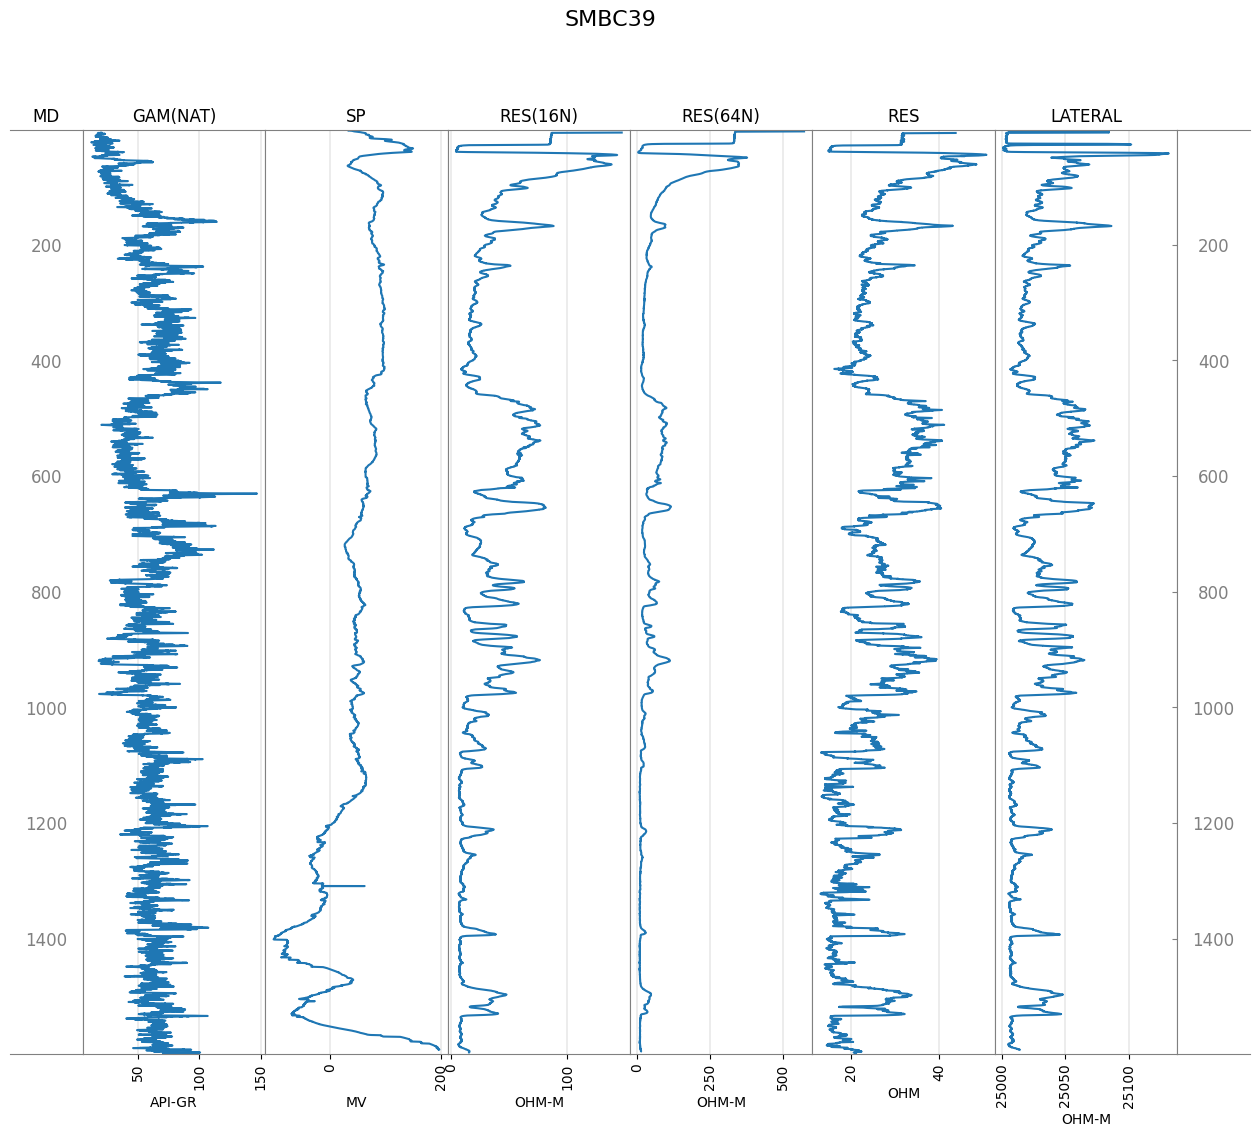

In [11]:
tracks = ['MD', 'GAM(NAT)', 'SP', 'RES(16N)', 'RES(64N)', 'RES', 'LATERAL', 'MD']
well.plot(tracks=tracks)

A portion of the curve we are interested in can be looked at separately.

In [ ]:
sp.to_basis(start=1200, stop=1600, step=10.0).plot()

A plot with curve trace (coloured in trace) can be plotted with `curve=true`.

In [ ]:
res = well.data['RES']
res.plot_2d(curve=True, lw=1, edgecolor='k')

### Curve Quality Check

A dictionary of tests can be used to check the quality of curves. There are predefined tests in the quality module but cutom functions can be used.
https://code.agilescientific.com/welly/welly.html#module-welly.quality

In [ ]:
import welly.quality as q

# sample test
tests = {
    'Each': [
        q.no_flat,
        q.no_monotonic,
        q.no_gaps,
    ],
    'Gamma': [
        q.all_positive,
        q.all_below(450),
        q.check_units(['API', 'GAPI']),
    ],
    'DT': [
        q.all_positive,
    ],
    'Sonic': [
        q.all_between(1, 10000),  # 1333 to 5000 m/s
        q.no_spikes(10),          # 10 spikes allowed
    ],
}

result = well.qc_data(tests)

The result can be displayed in HTML as well.

In [ ]:
from IPython.display import HTML

qc_table = well.qc_table_html(tests)
HTML(qc_table)

## Extracting Objects from LAS